In [ ]:
#установим нужные библиотеки
!pip install 'h5py==2.10.0' --force-reinstall

  Using cached https://files.pythonhosted.org/packages/3f/c0/abde58b837e066bca19a3f7332d9d0493521d7dd6b48248451a9e3fe2214/h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d9/5a/e7c31adbe875f2abbb91bd84cf2dc52d792b5a01506781dbcf25c91daf11/six-1.16.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3f/03/c3526fb4e79a793498829ca570f2f868204ad9a8040afcd72d82a8f121db/numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
ERROR: lucid 0.3.10 requires umap-learn, which is not installed.
ERROR: tensorflow 1.15.2 has requirement gast==0.2.2, but you'll have gast 0.4.0 which is incompatible.
ERROR: lucid 0.3.10 has requirement numpy<=1.19, but you'll have numpy 1.21.0 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.


In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_vggface
!pip install keras_applications
!pip install  image
!pip install gdown
!pip install livelossplot
!pip install q keras==2.2.4
%tensorflow_version 1.14.0

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-h1b69jc0
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-h1b69jc0
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp37-none-any.whl size=8326 sha256=f8f97babfb8a372ace0b24c582ed5ac002e46749961258bea1335194638f1a5e
  Stored in directory: /tmp/pip-ephem-wheel-cache-i2bszy03/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 7.9MB 10.3MB/s 
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19495 sha256=8749b260d8551c2e5d57e8c2da4d7f56851c8589a9913ec51e18455cf2033b08
  Stored in directory: /root/.cache/pip/wheels/87/4c/60/d5904e69c837fcdea7e03ffa0c657f35ced7e398c6f3ca17cc
Successfully built image
     |████████████████████████████████| 317kB 7.9MB/s 
  Found existing installation: Keras 2.

In [ ]:
#импортируем библиотеки необходимы для работы
import tensorflow as tf
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import gdown
from keras_vggface.vggface import VGGFace
import keras as keras
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from livelossplot.tf_keras import PlotLossesCallback
import os 
from pathlib import Path
import pickle

Using TensorFlow backend.


In [ ]:
#проверим версию tf, должна быть 1.x
%tensorflow_version

Currently selected TF version: 1.x
Available versions:
* 1.x
* 2.x


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Подготовка данных

In [1]:
#распакуем архивы с картинками
!unzip /content/drive/MyDrive/train.zip -d /content/
!unzip /content/drive/MyDrive/test_kaggle.zip -d /content/

In [ ]:
#загрузим датасет
train_df = pd.read_csv('/content/drive/MyDrive/train.csv',index_col='Unnamed: 0')
train_df.head()

,image_path,emotion
0,./train/anger/0.jpg,anger
1,./train/anger/1.jpg,anger
2,./train/anger/10.jpg,anger
3,./train/anger/100.jpg,anger
4,./train/anger/1000.jpg,anger


In [ ]:
#посмотрим информацию о датасете
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50046 entries, 0 to 50045
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  50046 non-null  object
 1   emotion     50046 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
#проверим количество уникальных эмоций
train_df.emotion.unique()

array(['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise', 'uncertain'], dtype=object)

In [ ]:
#проверим количество уникальных эмоций
train_df.emotion.nunique()

9

In [ ]:
#проверим на пропуски в данных
sum(train_df.image_path.isnull())

0

In [ ]:
#проверим на пропуски в данных
sum(train_df.emotion.isnull())

0

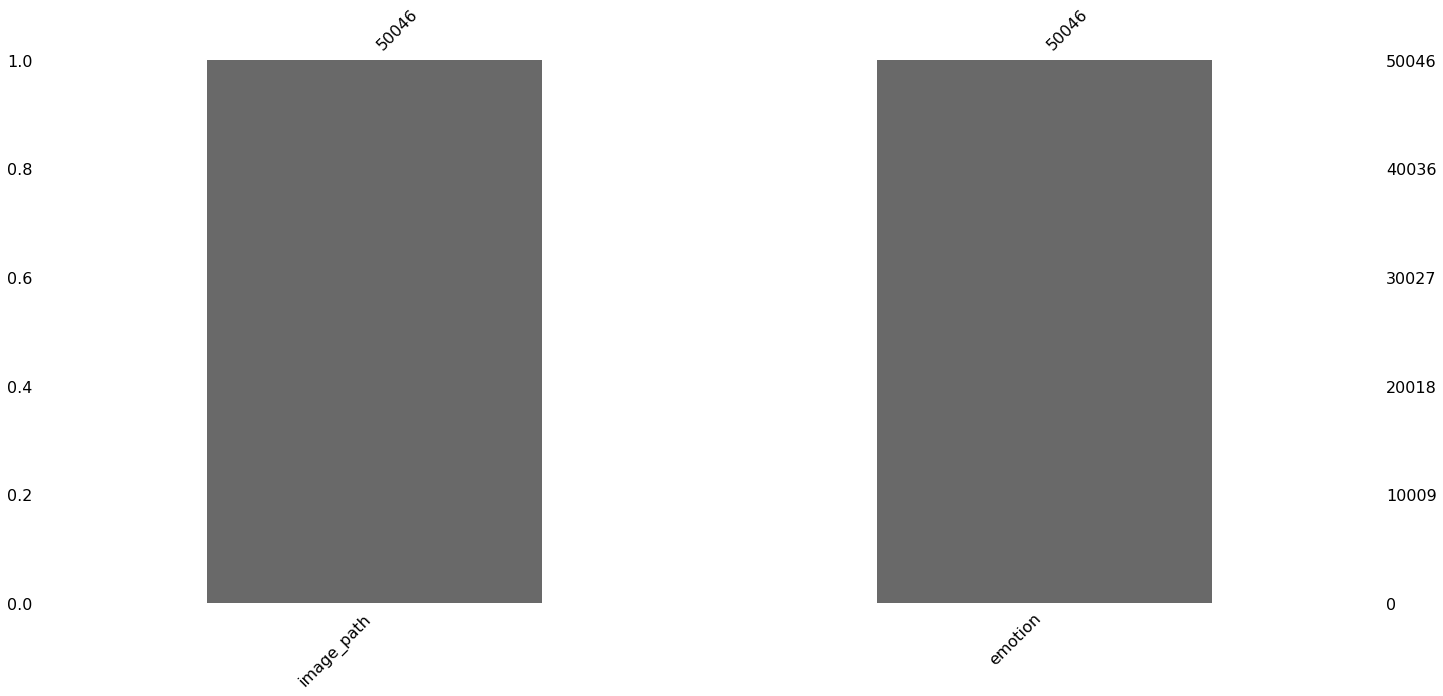

In [ ]:
msno.bar(train_df)

In [ ]:
#сделаем группировку по классу и посмотри на сколько сбалансированны классы

In [ ]:
train_df.groupby('emotion').count()

,image_path
emotion,
anger,7022
contempt,3085
disgust,3155
fear,5044
happy,5955
neutral,6795
sad,6740
surprise,6323
uncertain,5927


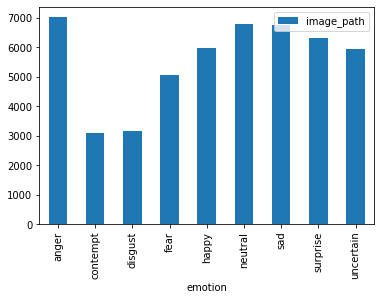

In [ ]:
train_df.groupby('emotion').count().plot(kind='bar')

In [ ]:
#видим, что классы anger, happy, neutral, sad, surprise, uncertain достаточно сбалансированы между собой.
#у класса fear немного меньше изображений
#у классов  contempt и disgust изображений меньше 2 раза по сравнению с другими

In [ ]:
#разобьем данные на тестовые и валидационные выборки, обязательно стратифицируем их
X_train, X_test, y_train, y_test = train_test_split(train_df['image_path'], train_df['emotion'],stratify= train_df['emotion'], test_size=0.33, random_state=42) #stratify= train_df['emotion']

In [ ]:
#посмотрим на размреность датасета тренировачной выборки
print(X_train.shape)
print(y_train.shape)

(33530,)
(33530,)


In [ ]:
#посмотрим на размреность датасета валидационной выборки
print(X_test.shape)
print(y_test.shape)

(16516,)
(16516,)


In [ ]:
#обьеденим колонки x_train с y_train
x_train_df = pd.DataFrame(X_train)
x_train_df['emotion'] = pd.DataFrame(y_train)
x_train_df.head()

,image_path,emotion
44856,./train/uncertain/1661.jpg,uncertain
4217,./train/anger/4794.jpg,anger
32692,./train/sad/2470.jpg,sad
41616,./train/surprise/4436.jpg,surprise
5633,./train/anger/6068.jpg,anger


In [ ]:
#обьеденим колонки x_test с y_test
x_test_df = pd.DataFrame(X_test)
x_test_df['emotion'] = pd.DataFrame(y_test)
x_test_df.head()

,image_path,emotion
45741,./train/uncertain/2458.jpg,uncertain
6190,./train/anger/657.jpg,anger
2532,./train/anger/3277.jpg,anger
21027,./train/happy/3447.jpg,happy
3192,./train/anger/3871.jpg,anger


In [ ]:
#проверим как стратифицировалась выборка

In [ ]:
x_train_df.groupby('emotion').count()

,image_path
emotion,
anger,4705
contempt,2067
disgust,2114
fear,3379
happy,3990
neutral,4552
sad,4516
surprise,4236
uncertain,3971


In [ ]:
x_test_df.groupby('emotion').count()

,image_path
emotion,
anger,2317
contempt,1018
disgust,1041
fear,1665
happy,1965
neutral,2243
sad,2224
surprise,2087
uncertain,1956


In [ ]:
#наблюдаем, что выборка в процентном соотношении выровнялась

In [ ]:
#подготовим данные для модели, будем использовать модель vggface с весами resnet50

In [ ]:
#напишем функцию для обработки картинки и приведению к формату vggface
def preprocess_input_facenet(image_):
    """
    функция на вход принимает тензор размером (1, H, W, 3)  
    возвращает: картинку, с примененным preprocess_input(..., version=2) из keras_vggface
    """
    preprocessed = utils.preprocess_input(image_, version=2)
    return preprocessed

In [ ]:
#подготовим генератор картинок с аугментацией для тренировачного датасета
image_gen_aug = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,  # максимальный угол поворота
      width_shift_range=0.2, # смещение максимум на 20% ширины по горизонтали
      height_shift_range=0.2, # смещение максимум на 20% высоты по вертикали
      zoom_range=0.2, # картинка будет увеличена или уменьшена не более чем на 20% 
      horizontal_flip=True, # случайное отражение по горизонтали
      fill_mode="nearest", # выбираем ближайший пиксель
      preprocessing_function=preprocess_input_facenet #укажем нашу функцию обработки изображений
      ) 

In [ ]:
#подготовим генератор картинок для валидационного датасета
image_gen = ImageDataGenerator(preprocessing_function=preprocess_input_facenet)

In [ ]:
BATCH_SIZE = 256 #укажем размер батча
IMAGE_SIZE = 224 #укажем размер картинки
#подготовим генераторы
train_generator = image_gen_aug.flow_from_dataframe(dataframe= x_train_df, #укажем датасет
                                                         x_col="image_path", #укажем колонку с картинками
                                                         y_col="emotion", #укажем целевую колонку
                                                         batch_size = BATCH_SIZE, #укажем размер батча
                                                         target_size=(IMAGE_SIZE,IMAGE_SIZE), #укажем размер картинки
                                                         shuffle=True, #перемешываем картинки 
                                                         seed = 10, #для воспроизводимости
                                                         class_mode='categorical') # укажем вариант классификации




val_generator = image_gen.flow_from_dataframe(dataframe= x_test_df, #укажем датасет
                                                         x_col="image_path", #укажем колонку с картинками
                                                         y_col="emotion", #укажем целевую колонку
                                                         batch_size = BATCH_SIZE, #укажем размер батча
                                                         target_size=(IMAGE_SIZE,IMAGE_SIZE), #укажем размер картинки
                                                         shuffle=False, #неперемешываем картинки 
                                                         seed = 10, #для воспроизводимости
                                                         class_mode='categorical') # укажем вариант классификации

Found 33530 validated image filenames belonging to 9 classes.
Found 16516 validated image filenames belonging to 9 classes.


In [ ]:
#посмотрим, что получилось для валидационного генератора и визуализируем картинку

In [ ]:
sample_images, sample_labels = next(val_generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


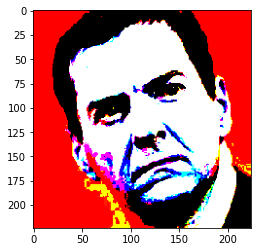

In [ ]:
plt.imshow(sample_images[22])

In [ ]:
#посмотрим, что получилось для тренировачного генератора и визуализируем картинку

In [ ]:
sample_images_a, sample_labels_a = next(train_generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


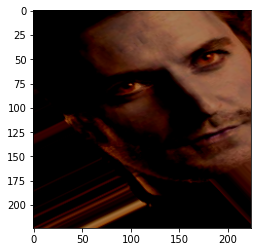

In [ ]:
plt.imshow(sample_images_a[22])

In [ ]:
#видим, что аугментация работает

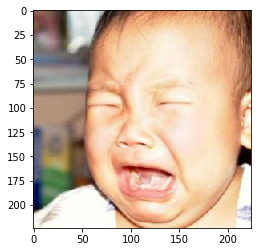

In [ ]:
#подготовим функцию которая будет возвращать картинку после препроцессинга в нормальный вид
def deprocess_image(vggface_image):
    """
    vggface_image -- (H, W, 3) картинка после препроцессинга. 
    содержит отрицательные значения и некорректно отображается matplotlib
    return: корректно отображаеая картинка типа np.uint8(!!). 
    """
    image  = np.copy(vggface_image)
    image[..., 0] += 91.4953
    image[..., 1] += 103.8827
    image[..., 2] += 131.0912    
    image = image[..., ::-1]
    image = np.uint8(image)
    return image

# теперь картинка отображаеться корректно
plt.imshow(deprocess_image(sample_images[50]))

#Проектирование модели

In [ ]:
#загрузим модель vggface с весами resnet50
vgg_model = VGGFace(model='resnet50',include_top=False, input_shape=(224, 224, 3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


94699520/94694792 [==============================] - 1s 0us/step


In [ ]:
#посмотрим на модель
vgg_model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [ ]:
#применим finetuning
#добавим свои слои и замороим и разморозим необходимые слои
#укажем количество классов
nb_class = 9
#сделаем sequential
#получим последний слой
last_layer = vgg_model.get_layer('avg_pool').output
#добавим слой flatten
x = Flatten(name='flatten')(last_layer)
#добавил 3 полносвязных слоя с функицей активации relu
dense_1 = Dense(1024,name='Dense1',activation='relu')(x)
dense_2 = Dense(512,name='Dense2',activation='relu')(dense_1)
dense_3 = Dense(253,name='Dense3',activation='relu')(dense_2)
#укажем выходной слой с функцией активации softmax
out = Dense(nb_class, activation='softmax', name='classifier')(dense_3)
#создадим нашу модель
custom_vgg_model = Model(vgg_model.input, out)

In [ ]:
print("Количество слоев: ", len(custom_vgg_model.layers))
#посмотрим на модель
custom_vgg_model.summary() 

Количество слоев:  179
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
_____________________________________________________________________

In [ ]:
#видим что обучаемых параметров у нас 26,263,083

In [ ]:
fine_tune_at = 80 # количетсво слоев для заморозки
# все слои до fine_tune_at заморозим
for layer in custom_vgg_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
#посмотрим на модель
custom_vgg_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________________

In [ ]:
#видим что обучаемых параметров стало 24,687,083

In [ ]:
#скомпилируем модель
#укажем лосс функцию
loss = keras.losses.CategoricalCrossentropy()
#укажем оптимайзер adam со скорость обучения 1e-4, loss функция CategoricalCrossentropy, метрика качествао accuracy
custom_vgg_model.compile(optimizer = keras.optimizers.Adam(lr=1e-4),#tf.keras.optimizers.Adam(lr=1e-5), # уменьшили скорость обучения
              loss=loss,
             metrics=['accuracy'])

#Обучение модели

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
#создадим сохранения чекпоинта
path = Path("/content/drive/MyDrive/model")
path.mkdir(exist_ok=True)
cpt_filename = "checkpoint_best.hdf5"
cpt_path =str(path / cpt_filename)

checkpoint = ModelCheckpoint(cpt_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

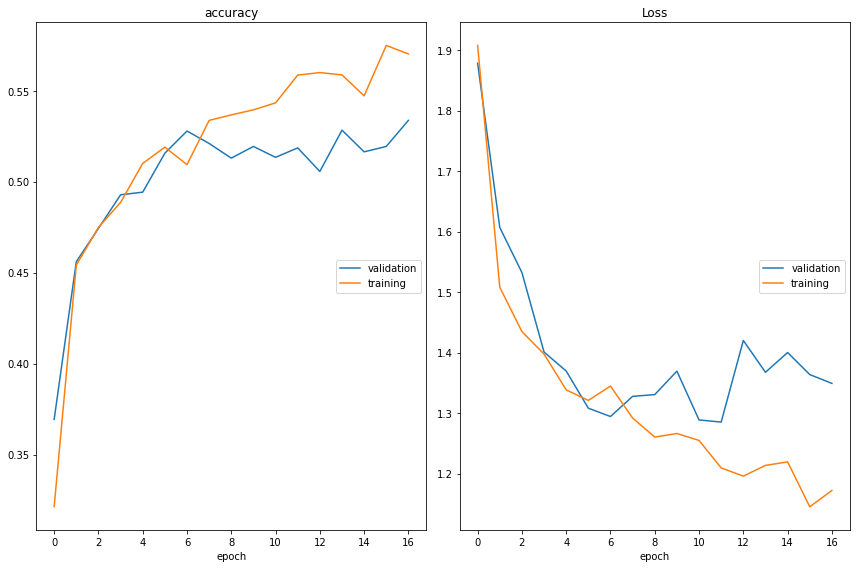

accuracy
	validation       	 (min:    0.369, max:    0.534, cur:    0.534)
	training         	 (min:    0.321, max:    0.575, cur:    0.570)
Loss
	validation       	 (min:    1.285, max:    1.878, cur:    1.349)
	training         	 (min:    1.145, max:    1.908, cur:    1.172)

Epoch 00017: val_accuracy improved from 0.52834 to 0.53372, saving model to /content/drive/MyDrive/model/checkpoint_best.hdf5


In [ ]:
#обучим нейроную сеть
#укажем количество эпох
EPOCHS = 17#25
history = custom_vgg_model.fit_generator(
    train_generator, #тренировачные данные
    epochs=EPOCHS, #количество эпох
    validation_data=val_generator, #валидационные данные
    steps_per_epoch=35, # количество шагов в эпохе
    callbacks=[PlotLossesCallback(),checkpoint]) #добавим PlotLossesCallback() для отрисовки прогресса обучения 

#Подготовим данные для отправки результатов на Kaggle 

In [ ]:
#загрузим обученную модель и посмотрим на неё 
model_load = tf.keras.models.load_model('/content/drive/MyDrive/model/checkpoint_best.hdf5')
model_load.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________________

In [ ]:
#проверим показатели
model_load.evaluate(val_generator)

65/65 [==============================] - 121s 2s/step - loss: 1.3131 - acc: 0.5337


[1.313077396612901, 0.53372484]

In [ ]:
#итоговые датасет в формате image_path, emotion
df_res  = pd.DataFrame(columns=['image_path','emotion'])
df_res

,image_path,emotion


In [ ]:
#создадим словарь для декодирования эмоции
class_dict = {}
for i,j in enumerate(val_generator.class_indices):
  class_dict.update({i:j})

In [ ]:
#сохраним словарь ответов
with open('/content/drive/MyDrive/model/class_dict.pickle', 'wb') as f:
  pickle.dump(class_dict, f)

In [ ]:
def kagle_csv(image_name,model):
  '''
  Функция которая принимает в себя имя картинки и модель
  Подготавливает картинку и делает предсказание
  возващает предсказанный класс
  '''
  img = image.load_img("/content/test_kaggle/"+image_name, target_size=(224, 224)) # модель работает с картинками размера 224 на 224
  x = image.img_to_array(img) #переводим картинку в массив
  x = np.expand_dims(x, axis=0) #разворачиваем массив
  x = utils.preprocess_input(x, version=2) # мы используем resnet50 -- поэтому version2
  preds = model.predict(x)#прогнозируем
  cls = class_dict.get(np.argmax(preds)) #определяем класс
  return cls


In [ ]:
#укажем путь до картинок у которых необходим определить класс
path_image_predict = '/content/test_kaggle/'
#в цикле вызываем функцию предсказания и добавляем данные в итоговый датасет
for number,pict in enumerate(os.listdir(path_image_predict)):
  cls = kagle_csv(pict,model_load)
  df_res = df_res.append({'image_path':pict,'emotion':cls},ignore_index=True)
  if number % 1000 == 0:
    print(number)


0
1000
2000
3000
4000


In [ ]:
#выгружаем датасет в csv для отправки на платформу kaggle
df_res.to_csv('/content/drive/MyDrive/submission.csv',index=False)

In [ ]:
#проверим время работы модели, подготовим 3 картинки и сделает прогноз

In [ ]:
  img_1 = image.load_img("/content/test_kaggle/0.jpg", target_size=(224, 224)) # модель работает с картинками размера 224 на 224
  x_1 = image.img_to_array(img_1) #переводим картинку в массив
  x_1 = np.expand_dims(x_1, axis=0) #разворачиваем массив
  x_1 = utils.preprocess_input(x_1, version=2) # мы используем resnet50 -- поэтому version2

In [ ]:
  img_2 = image.load_img("/content/test_kaggle/1.jpg", target_size=(224, 224)) # модель работает с картинками размера 224 на 224
  x_2 = image.img_to_array(img_2) #переводим картинку в массив
  x_2 = np.expand_dims(x_2, axis=0) #разворачиваем массив
  x_2 = utils.preprocess_input(x_2, version=2) # мы используем resnet50 -- поэтому version2

In [ ]:
  img_3 = image.load_img("/content/test_kaggle/10.jpg", target_size=(224, 224)) # модель работает с картинками размера 224 на 224
  x_3 = image.img_to_array(img_3) #переводим картинку в массив
  x_3 = np.expand_dims(x_3, axis=0) #разворачиваем массив
  x_3 = utils.preprocess_input(x_3, version=2) # мы используем resnet50 -- поэтому version2

In [ ]:
%%time
pred_1 = model_load.predict(x_1)
pred_2 = model_load.predict(x_2)
pred_3 = model_load.predict(x_3)

CPU times: user 75 ms, sys: 2 ms, total: 77 ms
Wall time: 73 ms
